# Sign Language Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Sign_language_dataset/archive/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Sign_language_dataset/archive/sign_mnist_test.csv')

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [ ]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = y_train.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 6)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k] , cmap='gray')
            ax[i,j].set_title(str(unique_labels[y_train[k]]))
            k = k+1;
    plt.tight_layout()

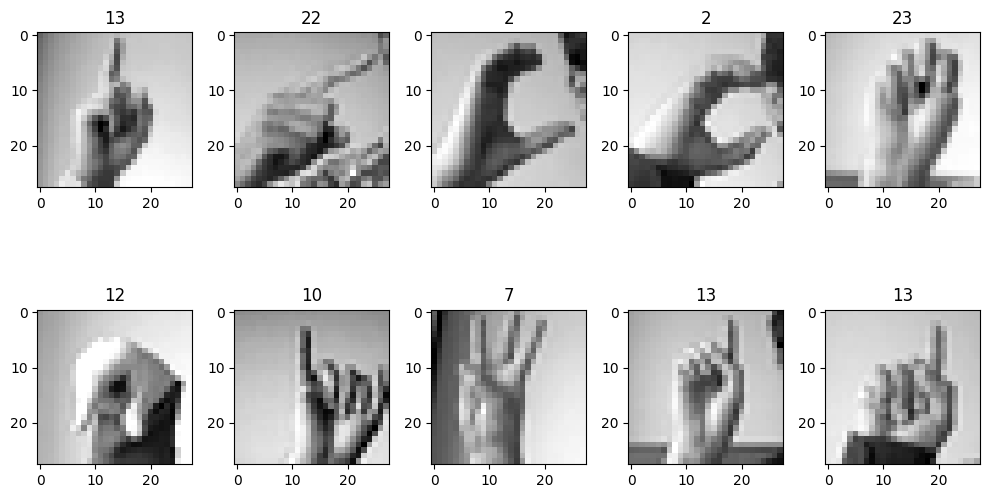

In [ ]:
show_images(X_train, y_train)

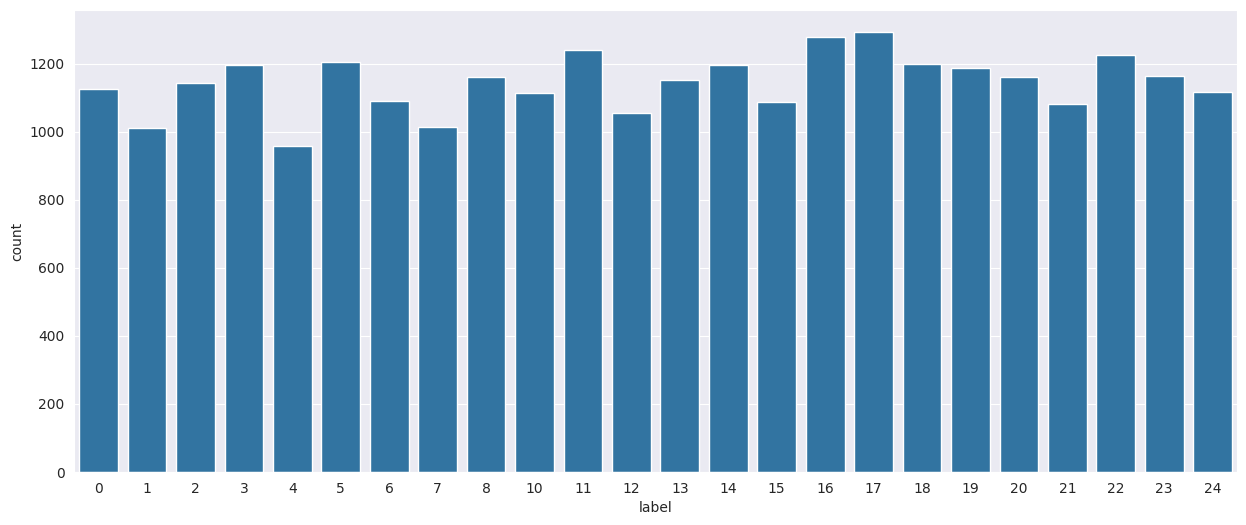

In [ ]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_train)
plt.show()

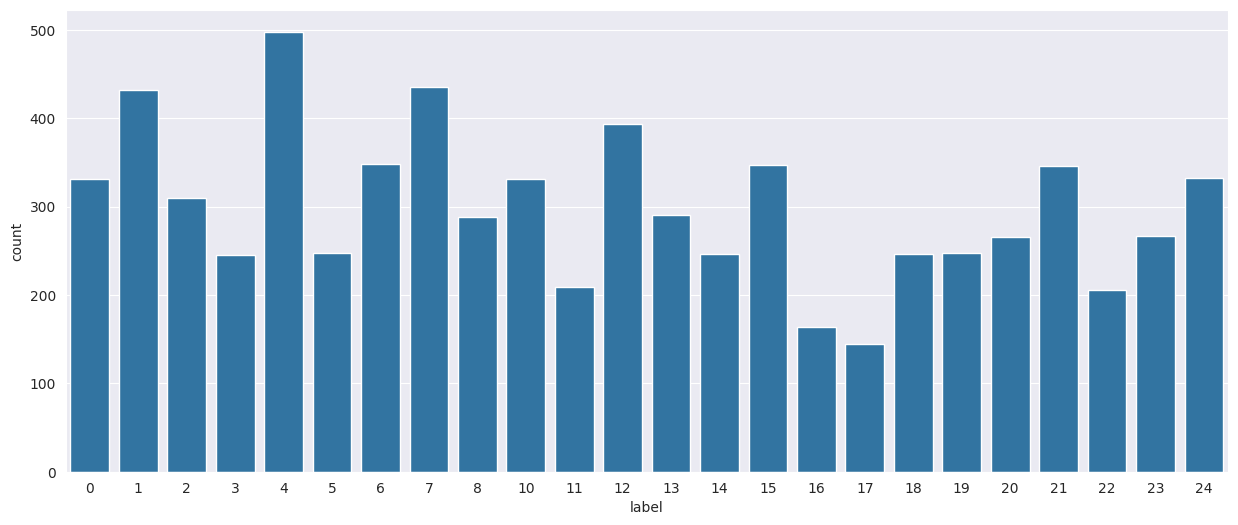

In [ ]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_test)
plt.show()

## 2. Building Simple Multiclass Classification Methods

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
svc = SVC(random_state=5)
svc.fit(X_train, y_train)
print('='*25)
print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

SVC
accuracy of train set: 1.0
accuracy of test set: 0.8418851087562744


In [ ]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print('='*25)
print('LinearSVC')
print(f'accuracy of train set: {lsvc.score(X_train, y_train)}')
print(f'accuracy of test set: {lsvc.score(X_test, y_test)}')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC
accuracy of train set: 0.9999635767619741
accuracy of test set: 0.6108477412158394


In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('='*25)
print('SGD Classifier')
print(f'accuracy of train set: {sgd.score(X_train, y_train)}')
print(f'accuracy of test set: {sgd.score(X_test, y_test)}')

SGD Classifier
accuracy of train set: 0.9891094518302677
accuracy of test set: 0.636781929726715


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_test, y_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_train, y_train)}')
print(f'accuracy of test set: {rf.score(X_test, y_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8092582264361405


In [ ]:
decisiontree = DecisionTreeClassifier(max_depth=50, random_state=5)
decisiontree.fit(X_train, y_train)
print('='*25)
print('DecisionTreeClassifier')
print(f'accuracy of train set: {decisiontree.score(X_train, y_train)}')
print(f'accuracy of test set: {decisiontree.score(X_test, y_test)}')

DecisionTreeClassifier
accuracy of train set: 1.0
accuracy of test set: 0.4348856664807585


In [ ]:
bagging = BaggingClassifier(ExtraTreeClassifier(random_state=5))
bagging.fit(X_train, y_train)
print('='*25)
print('BaggingClassifier')
print(f'accuracy of train set: {bagging.score(X_train, y_train)}')
print(f'accuracy of test set: {bagging.score(X_test, y_test)}')

BaggingClassifier
accuracy of train set: 1.0
accuracy of test set: 0.6606246514221974


In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print('='*25)
print('LGBM Classifier')
print(f'accuracy of train set: {lgbm.score(X_train, y_train)}')
print(f'accuracy of test set: {lgbm.score(X_test, y_test)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.401077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 179589
[LightGBM] [Info] Number of data points in the train set: 27455, number of used features: 784
[LightGBM] [Info] Start training from score -3.193877
[LightGBM] [Info] Start training from score -3.302598
[LightGBM] [Info] Start training from score -3.178017
[LightGBM] [Info] Start training from score -3.133566
[LightGBM] [Info] Start training from score -3.356500
[LightGBM] [Info] Start training from score -3.126899
[LightGBM] [Info] Start training from score -3.226371
[LightGBM] [Info] Start training from score -3.299632
[LightGBM] [Info] Start training from score -3.162406
[LightGBM] [Info] Start training from score -3.204591
[LightGBM] [Info] Start training from score -3.096631
[LightGBM] [Info] Start training from score -3.259008
[LightGBM] [Info] Start training from score -3.171917
[Light

In [ ]:
catboost = CatBoostClassifier(learning_rate=0.3, max_depth=10, n_estimators=25)
catboost.fit(X_train, y_train)
print('='*25)
print('CatBoost Classifier')
print(f'accuracy of train set: {catboost.score(X_train, y_train)}')
print(f'accuracy of test set: {catboost.score(X_test, y_test)}')

0:	learn: 2.4088305	total: 1m 43s	remaining: 41m 28s
1:	learn: 1.9359334	total: 3m 34s	remaining: 41m 3s
2:	learn: 1.5939200	total: 5m 19s	remaining: 39m 5s
3:	learn: 1.3613254	total: 7m 5s	remaining: 37m 14s
4:	learn: 1.1771566	total: 8m 50s	remaining: 35m 23s
5:	learn: 1.0555906	total: 10m 33s	remaining: 33m 25s
6:	learn: 0.9468483	total: 12m 18s	remaining: 31m 38s
7:	learn: 0.8238494	total: 14m 4s	remaining: 29m 53s
8:	learn: 0.7333758	total: 15m 49s	remaining: 28m 7s
9:	learn: 0.6519195	total: 17m 33s	remaining: 26m 20s
10:	learn: 0.5947239	total: 19m 19s	remaining: 24m 35s
11:	learn: 0.5424499	total: 21m 4s	remaining: 22m 49s
12:	learn: 0.4983981	total: 22m 50s	remaining: 21m 4s
13:	learn: 0.4694163	total: 24m 32s	remaining: 19m 17s
14:	learn: 0.4417850	total: 26m 15s	remaining: 17m 30s
15:	learn: 0.4199057	total: 27m 59s	remaining: 15m 44s
16:	learn: 0.3886450	total: 29m 44s	remaining: 13m 59s
17:	learn: 0.3686915	total: 31m 28s	remaining: 12m 14s
18:	learn: 0.3399776	total: 33m 